In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

2022-11-23 17:16:46.181026: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)


x = layers.Dense(64, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)


model = keras.Model(inputs, output)

2022-11-23 17:16:48.079540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 17:16:48.086927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 17:16:48.087576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 17:16:48.088494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

In [7]:
learning_rate = 0.002
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)

loss = keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        shuffle=True,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        './test',
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


2022-11-23 17:17:50.479672: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-23 17:17:51.117165: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-23 17:17:51.118073: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-23 17:17:51.118114: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-23 17:17:51.119004: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-23 17:17:51.119089: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 109ms/step - loss: 0.6675 - accuracy: 0.5935 - val_loss: 0.6162 - val_accuracy: 0.6294
Epoch 2/10
80/80 [==============================] - 9s 107ms/step - loss: 0.5696 - accuracy: 0.7384 - val_loss: 0.5313 - val_accuracy: 0.7157
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.4690 - accuracy: 0.7974 - val_loss: 0.5031 - val_accuracy: 0.7462
Epoch 4/10
80/80 [==============================] - 9s 107ms/step - loss: 0.4097 - accuracy: 0.8243 - val_loss: 0.3768 - val_accuracy: 0.8579
Epoch 5/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3595 - accuracy: 0.8488 - val_loss: 0.3501 - val_accuracy: 0.8553
Epoch 6/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3192 - accuracy: 0.8726 - val_loss: 0.3413 - val_accuracy: 0.8452
Epoch 7/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3225 - accuracy: 0.8620 - val_loss: 0.3216 - val_accuracy: 0.8655
Epoch 8/10
80/80

Text(0.5, 1.0, 'Training and validation loss')

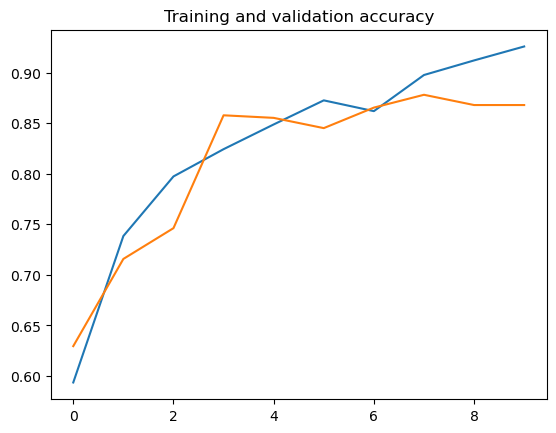

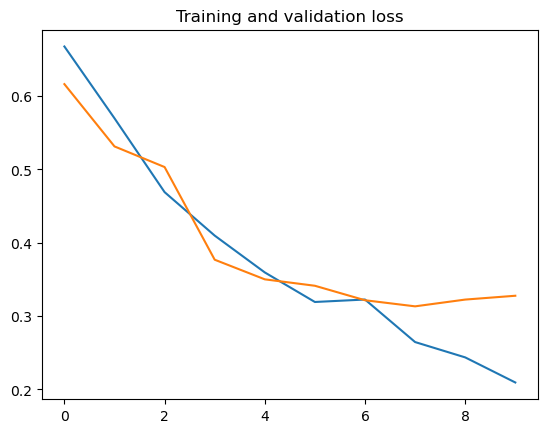

In [14]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='test accuracy')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Training and validation loss')

In [18]:
training_loss = history.history['loss']
training_loss

[0.6675174832344055,
 0.5696113109588623,
 0.46895045042037964,
 0.40968817472457886,
 0.35946938395500183,
 0.31917551159858704,
 0.3225288987159729,
 0.26454344391822815,
 0.24363043904304504,
 0.20943576097488403]

In [19]:
import statistics

In [21]:
result = statistics.pstdev(training_loss)
result

0.13990569387308757

In [24]:
training_accuracy = history.history['accuracy']
training_accuracy

[0.5934755206108093,
 0.7383939623832703,
 0.797365128993988,
 0.8243412971496582,
 0.8488080501556396,
 0.8726474046707153,
 0.8619824051856995,
 0.8977415561676025,
 0.9121706485748291,
 0.9259724020957947]

In [27]:
median = statistics.median(training_accuracy)
median

0.8553952276706696

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        './test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [29]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
80/80 [==============================] - 15s 191ms/step - loss: 0.4662 - accuracy: 0.8043 - val_loss: 0.2841 - val_accuracy: 0.8909
Epoch 2/10
80/80 [==============================] - 15s 188ms/step - loss: 0.4390 - accuracy: 0.7961 - val_loss: 0.4095 - val_accuracy: 0.8046
Epoch 3/10
80/80 [==============================] - 15s 190ms/step - loss: 0.3940 - accuracy: 0.8287 - val_loss: 0.2920 - val_accuracy: 0.8782
Epoch 4/10
80/80 [==============================] - 15s 190ms/step - loss: 0.4082 - accuracy: 0.8181 - val_loss: 0.2688 - val_accuracy: 0.8934
Epoch 5/10
80/80 [==============================] - 15s 190ms/step - loss: 0.3973 - accuracy: 0.8294 - val_loss: 0.3097 - val_accuracy: 0.8731
Epoch 6/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3869 - accuracy: 0.8331 - val_loss: 0.5229 - val_accuracy: 0.7665
Epoch 7/10
80/80 [==============================] - 15s 192ms/step - loss: 0.3692 - accuracy: 0.8425 - val_loss: 0.3101 - val_accuracy: 0.8579

Text(0.5, 1.0, 'Training and validation loss')

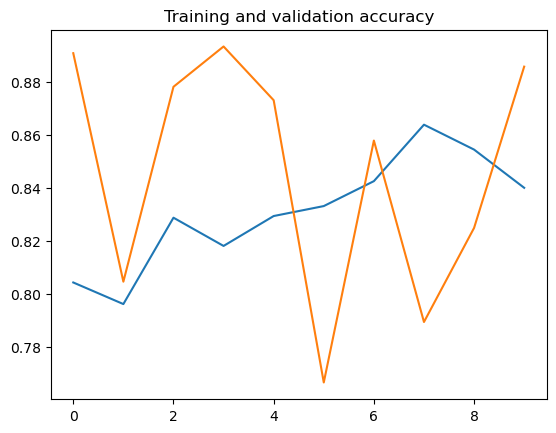

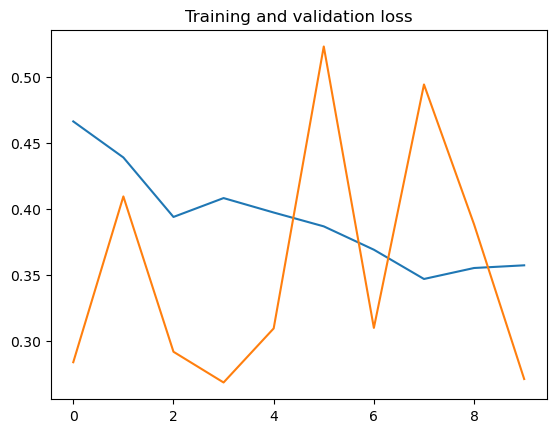

In [30]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='test accuracy')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Training and validation loss')

In [31]:
validation_loss = history.history['val_loss']
validation_loss

[0.28411048650741577,
 0.4094884395599365,
 0.29202327132225037,
 0.2687944173812866,
 0.30966100096702576,
 0.5228936076164246,
 0.3100680112838745,
 0.49415549635887146,
 0.3883400559425354,
 0.271397203207016]

In [32]:
mean = sum(validation_loss)/len(validation_loss)
mean

0.3550931990146637

In [35]:
validation_accuracy = history.history['val_accuracy']
last_5 = validation_accuracy[5:]
last_5

[0.7664974331855774,
 0.8578680157661438,
 0.789340078830719,
 0.8248730897903442,
 0.8857868313789368]

In [36]:
mean_accuracy = sum(last_5)/len(last_5)
mean_accuracy

0.8248730897903442

1/1 [==============================] - 0s 54ms/step
['conv2d_4', 'max_pooling2d', 'flatten', 'dense', 'dense_1']


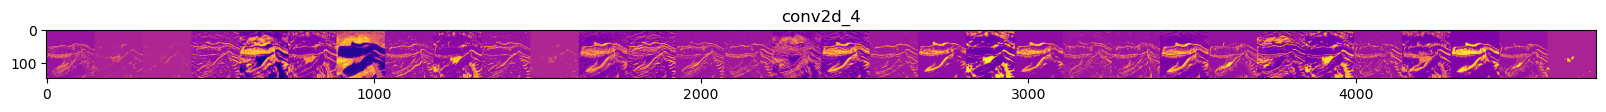

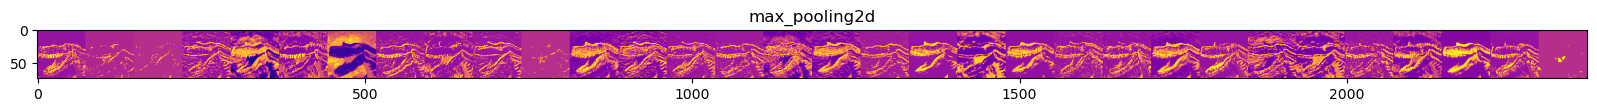

In [74]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(inputs, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
DirPath = './train/dino/'
Files = os.listdir(DirPath)

dino_img_files = [os.path.join(DirPath, f) for f in Files]
dragon_img_files = [os.path.join(DirPath, f) for f in Files]   

    
img_path = random.choice(dino_img_files + dragon_img_files)


img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]
print(layer_names)

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='plasma')   